# K-means clustering algorithm
step_1 random centriods  
step_2 label data points  
step_3 recalculated the new centriods  
  

repeat step 2-3 if the new centriods had change positions  
stop when centriods remain the same (break point)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read CSV
raw_data = pd.read_csv("data_scatter.csv")
# simple check raw_data
# print(type(raw_data))
# print(raw_data.shape)
# print(raw_data.head(5))
# print(raw_data["V1"])

In [3]:
def dist(a, b, ax=1): # calculate "Euclidean distance" func
    return np.linalg.norm(a-b, axis = ax)

def plotClust(data, C, cluster_label): # plot graph func
    colors = ['red', 'purple', 'blue', 'pink', 'yellow', 'green', 'navy', 'coral']

    plt.figure(figsize=(8,6))

    for i in range(K):
        points = []
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        plt.scatter(points[:,0], points[:,1], c=colors[i])

    plt.scatter(C[:,0], C[:,1], marker = '*', color = 'Black', s = 200)
    
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.title('Round')
    plt.grid()

In [7]:
# K-mean step_1: run once, don't need to repeat

# user design to separate data into 3 groups
K = 3
data = np.array(raw_data) # 2D array
# simple check data
# print(type(data))
# print(data.shape)
# print(data)

# random centroid points for each class
C_x = np.random.randint(np.min(data[:,0]), np.max(data[:,0]), size = K)
C_y = np.random.randint(np.min(data[:,1]), np.max(data[:,1]), size = K)

C = np.zeros((3,2))
C_old = np.zeros(C.shape)

C[:,0] = C_x
C[:,1] = C_y
# simple check centroid point
# print(C_x,"\n")
# print(C_y,"\n")
# print(C)

In [9]:
# K-mean step_2
    # assign each data point to the nearest group
cluster_label = np.zeros([len(data),1])

for i in range(len(data)): # loop 3000 times (have 3000 samples)
    distance = dist(data[i,:],C) # find distance between this point to all 3 centroid points
    cluster = np.argmin(distance) # find min distance
    cluster_label[i] = cluster # store cluster to "cluster_label" variable
    

error: 64.235


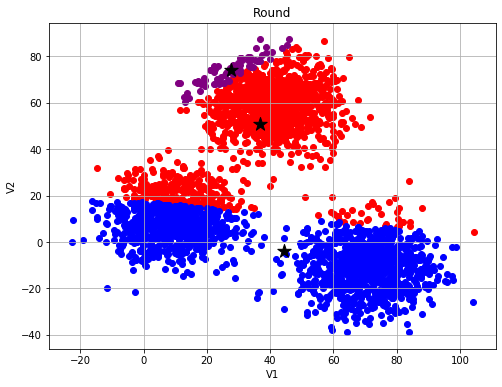

In [10]:
# K-mean step_3
# Recalculate new centroids for each group
C_old = C.copy() # will use both for campare difference

for i in range(K):
    points = []
    points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
    C[i] = np.mean(points, axis = 0)

plotClust(data, C, cluster_label.copy()) # show graph

error = dist(C, C_old, None) # compare before-after recalculate new centroids for each group
print("error: {:.3f}".format(error))

error round 2: 9.166
error round 3: 7.105
error round 4: 11.577
error round 5: 24.771
error round 6: 16.717
error round 7: 0.894
error round 8: 0.043
error round 9: 0.000


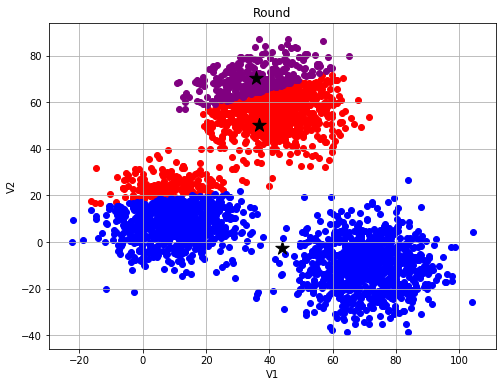

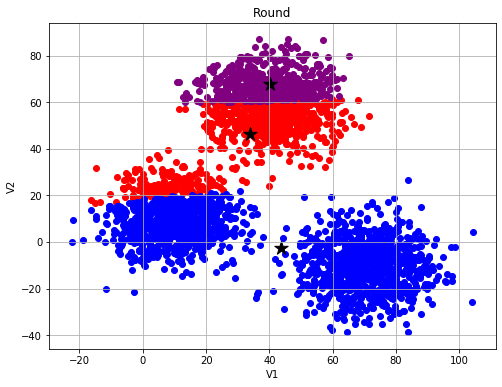

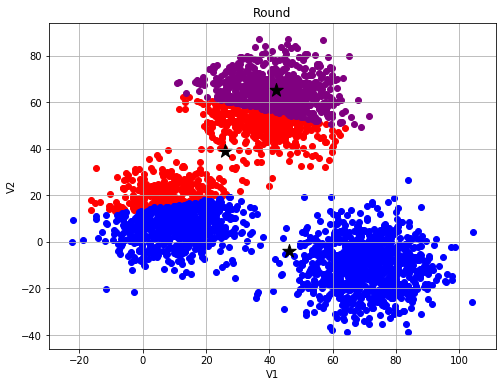

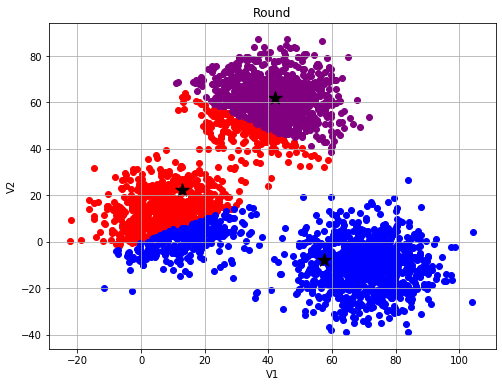

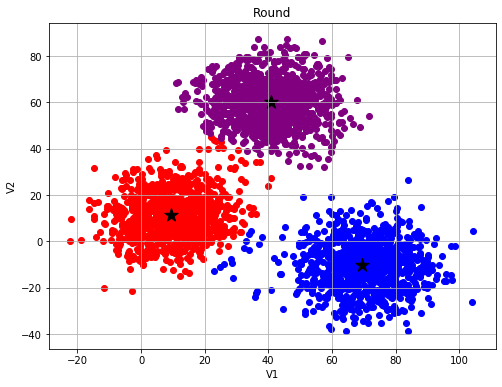

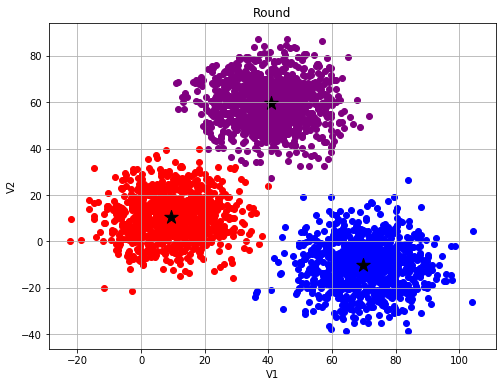

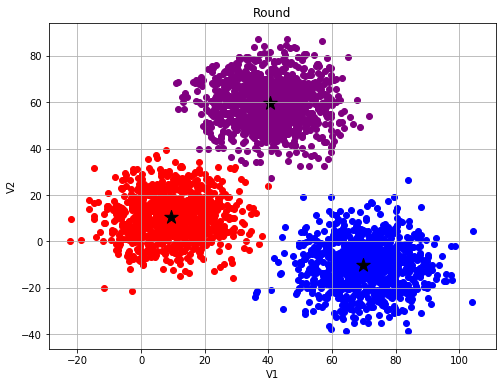

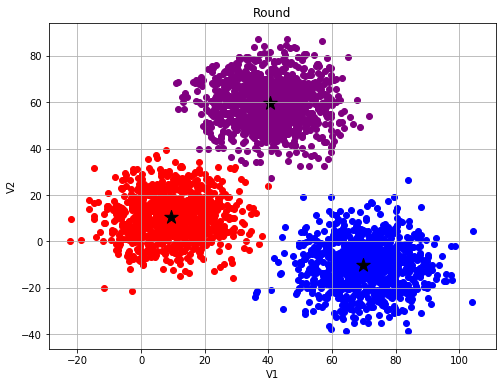

In [11]:
# using loop for repeat step 2-3

round_count = 2 # start count 1st round
# error = 1 # dummy variable for enter while loop, value will be changed by func in loop

while error != 0: # loop until distance of old-new centroid = 0
    # K-mean step_2
    # assign each data point to the nearest group
    cluster_label = np.zeros([len(data),1])

    for i in range(len(data)): # loop 3000 times (have 3000 samples)
        distance = dist(data[i,:],C) # find distance between this point to all 3 centroid points
        cluster = np.argmin(distance) # find min distance
        cluster_label[i] = cluster # store cluster to "cluster_label" variable
    
    # K-mean step_3
    # Recalculate new centroids for each group

    C_old = C.copy() # will use both for campare difference

    for i in range(K):
        points = []
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0)
    
    plotClust(data, C, cluster_label.copy()) # show graph
    
    error = dist(C, C_old, None) # compare before-after recalculate new centroids for each group
    print("error round {}: {:.3f}".format(round_count,error))
    round_count += 1